# SiamMask
Fast Online Object Tracking and Segmentation: A Unifying Approach:
<img src="https://camo.githubusercontent.com/5c38236e1e40efcae31beb39d2f074820a261501ed18d706ec11b8b16bb6b809/687474703a2f2f7777772e726f626f74732e6f782e61632e756b2f7e7177616e672f5369616d4d61736b2f696d672f5369616d4d61736b2e6a7067">

**Original code :** [SiamMask](https://github.com/foolwood/SiamMask) by [Qiang Wang](https://github.com/foolwood)

**[Fast Online Object Tracking and Segmentation: A Unifying Approach](https://arxiv.org/abs/1812.05050)**,

Qiang Wang, Li Zhang, Luca Bertinetto, Weiming Hu, Philip H.S. Torr,

CVPR 2019

**Citation**
```
@article{wang2019fast,
      title={Fast Online Object Tracking and Segmentation: A Unifying Approach},
      author={Qiang Wang and Li Zhang and Luca Bertinetto and Weiming Hu and Philip H. S. Torr},
      journal={CVPR},
      year={2019}
}
```

## 0. Environment Setup & Drive mount

In [1]:
!nvidia-smi
#GPU가 잘 인식되는지 확인하는 과정입니다.

Wed Jul 19 06:15:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!python --version

Python 3.10.12


In [3]:
!wget https://www.python.org/ftp/python/3.6.13/Python-3.6.13.tgz
!tar xvfz Python-3.6.13.tgz
%cd Python-3.6.13
!./configure
!make
!sudo make install
!sudo apt install libffi-dev
#Python 버전을 낮추는 과정으로 4분 정도 소요됩니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Compiling '/usr/local/lib/python3.6/encodings/mac_romanian.py'...
Compiling '/usr/local/lib/python3.6/encodings/mac_turkish.py'...
Compiling '/usr/local/lib/python3.6/encodings/mbcs.py'...
Compiling '/usr/local/lib/python3.6/encodings/oem.py'...
Compiling '/usr/local/lib/python3.6/encodings/palmos.py'...
Compiling '/usr/local/lib/python3.6/encodings/ptcp154.py'...
Compiling '/usr/local/lib/python3.6/encodings/punycode.py'...
Compiling '/usr/local/lib/python3.6/encodings/quopri_codec.py'...
Compiling '/usr/local/lib/python3.6/encodings/raw_unicode_escape.py'...
Compiling '/usr/local/lib/python3.6/encodings/rot_13.py'...
Compiling '/usr/local/lib/python3.6/encodings/shift_jis.py'...
Compiling '/usr/local/lib/python3.6/encodings/shift_jis_2004.py'...
Compiling '/usr/local/lib/python3.6/encodings/shift_jisx0213.py'...
Compiling '/usr/local/lib/python3.6/encodings/tis_620.py'...
Compiling '/usr/local/lib/python3.6/encodings/undefined.py'...
Compiling '/us

In [4]:
!python --version
#Python 3.6.13을 출력해야 합니다.

Python 3.6.13


In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
cd ..

/content


In [7]:
cd gdrive/MyDrive/Samsung_AI_expert/SiamMask/

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/SiamMask


In [8]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 19.8MB/s 
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [9]:
!pip install --upgrade setuptools wheel

     |████████████████████████████████| 952 kB 16.3 MB/s            
  Attempting uninstall: setuptools
    Found existing installation: setuptools 40.6.2
    Uninstalling setuptools-40.6.2:
      Successfully uninstalled setuptools-40.6.2


In [10]:
!pip install -r requirements.txt
#2분 정도 소요됩니다.
#실행 후 런타임을 다시 시작해주셔야 합니다. (RESTART RUNTIME 버튼을 눌러주세요)

     |████████████████████████████████| 2.1 MB 11.0 MB/s            
     |████████████████████████████████| 13.9 MB 54.3 MB/s            
     |████████████████████████████████| 57 kB 4.2 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 12.6 MB 38.8 MB/s            
     |████████████████████████████████| 3.7 MB 45.3 MB/s            
     |████████████████████████████████| 31.2 MB 4.5 MB/s             
     |████████████████████████████████| 2.8 MB 58.3 MB/s            
     |████████████████████████████████| 8.9 MB 57.3 MB/s            
     |████████████████████████████████| 46 kB 3.7 MB/s             
     |████████████████████████████████| 101 kB 10.5 MB/s           
     |████████████████████████████████| 25.0 MB 1.2 MB/s             
     |████████████████████████████████| 591.8 MB 4.2 kB/s            
     |████████████████████████████████| 54 kB 2.8 MB/s             
     |████████████████████████████████| 121 kB 61.2 MB/s     

In [1]:
#런타임 재시작 후에 경로가 초기화되어서 실행해주셔야 합니다

In [2]:
cd gdrive/MyDrive/Samsung_AI_expert/SiamMask/

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/SiamMask


### Overall Structure

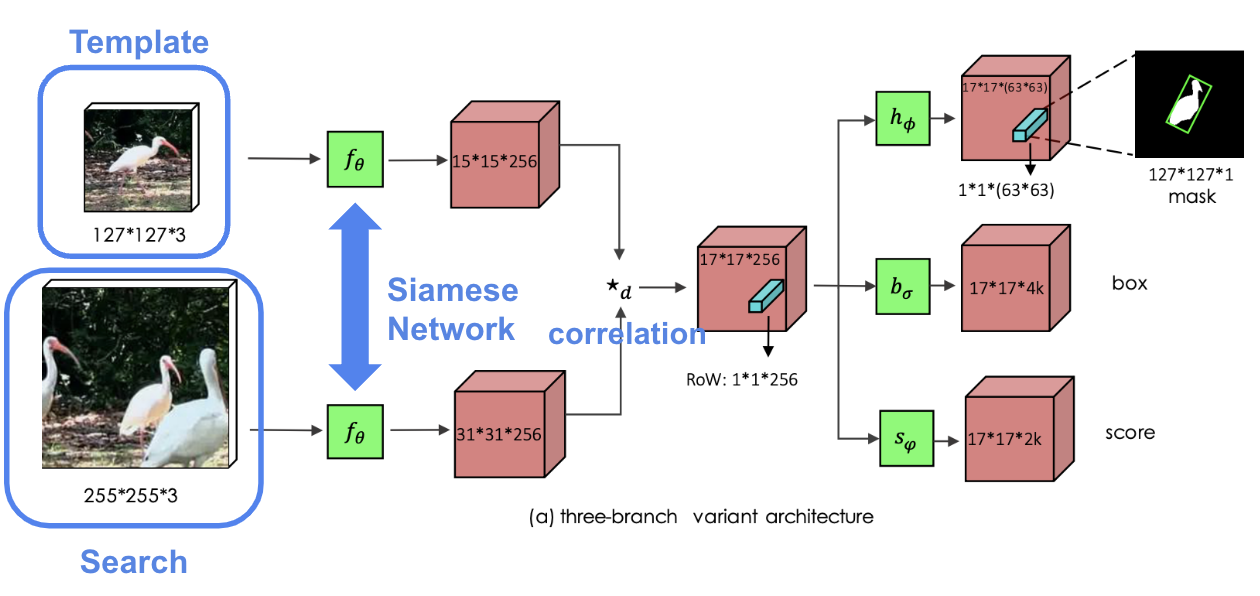

### 실습 내용:

* Dataloader 정의 (input, output)

* Model 정의

* Train code

* Test code

* Visualization

* Demo using youtube

#### Dataset

coco Dataset

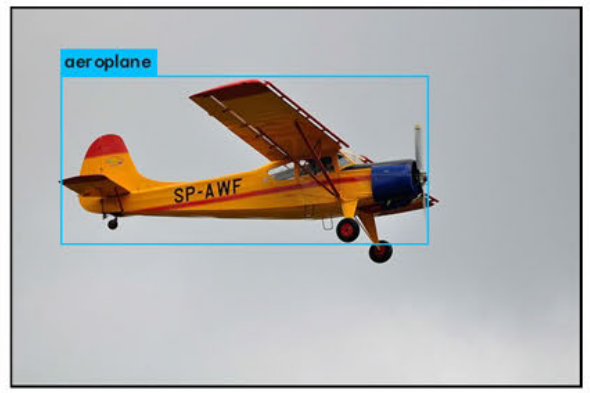

## 1) 데이터로더 정의


In [3]:
from utils.config_helper import load_config
from types import SimpleNamespace
cfg = load_config(SimpleNamespace(config="experiments/siammask_base/config.json"))

In [4]:
from torch.utils.data import Dataset
import os
from os.path import join, isdir, isfile
from os import makedirs
from utils.bbox_helper import *
from datasets.siam_mask_dataset import crop_hwc

from datasets.siam_mask_dataset import Augmentation, AnchorTargetLayer, SubDataSet
from utils.anchors import Anchors
import random

sample_random = random.Random()
sample_random.seed(123456)


class DataSets(Dataset):
    def __init__(self, cfg, anchor_cfg, num_epoch=1):
        super(DataSets, self).__init__()

        # anchors
        self.anchors = Anchors(anchor_cfg)

        # size
        self.template_size = 127
        self.origin_size = 127
        self.search_size = 255
        self.size = 25
        self.base_size = 8
        self.crop_size = 0
        self.template_small = False
        self.anchors.generate_all_anchors(im_c=self.search_size//2, size=self.size)

        cfg['anchor_target'] = {}
        self.anchor_target = AnchorTargetLayer(cfg['anchor_target'])

        self.all_data = []
        start = 0
        self.num = 0
        for name in cfg['datasets']:
            dataset = cfg['datasets'][name]
            dataset['mark'] = name
            dataset['start'] = start

            dataset = SubDataSet(dataset)
            dataset.log()
            self.all_data.append(dataset)

            start += dataset.num  # real video number
            self.num += dataset.num_use  # the number used for subset shuffle

        # data augmentation
        aug_cfg = cfg['augmentation']
        self.template_aug = Augmentation(aug_cfg['template'])
        self.search_aug = Augmentation(aug_cfg['search'])
        self.gray = aug_cfg['gray']
        self.neg = aug_cfg['neg']
        self.inner_neg = 0 if 'inner_neg' not in aug_cfg else aug_cfg['inner_neg']

        self.pick = None  # list to save id for each img
        if 'num' in cfg:  # number used in training for all dataset
            self.num = int(cfg['num'])
        self.num *= num_epoch
        self.shuffle()

        self.infos = {
                'template': self.template_size,
                'search': self.search_size,
                'template_small': self.template_small,
                'gray': self.gray,
                'neg': self.neg,
                'inner_neg': self.inner_neg,
                'crop_size': self.crop_size,
                'anchor_target': self.anchor_target.__dict__,
                'num': self.num // num_epoch
                }
        print('dataset informations: \n{}'.format(self.infos, indent=4))

    def imread(self, path):
        img = cv2.imread(path)

        if self.origin_size == self.template_size:
            return img, 1.0

        def map_size(exe, size):
            return int(round(((exe + 1) / (self.origin_size + 1) * (size+1) - 1)))

        nsize = map_size(self.template_size, img.shape[1])

        img = cv2.resize(img, (nsize, nsize))

        return img, nsize / img.shape[1]

    def shuffle(self):
        pick = []
        m = 0
        while m < self.num:
            p = []
            for subset in self.all_data:
                sub_p = subset.shuffle()
                p += sub_p

            sample_random.shuffle(p)

            pick += p
            m = len(pick)
        self.pick = pick
        print("shuffle done!")
        print("dataset length {}".format(self.num))

    def __len__(self):
        return self.num

    def find_dataset(self, index):
        for dataset in self.all_data:
            if dataset.start + dataset.num > index:
                return dataset, index - dataset.start

    def __getitem__(self, index, debug=False):
        index = self.pick[index]
        dataset, index = self.find_dataset(index)

        gray = self.gray and self.gray > random.random()
        neg = self.neg and self.neg > random.random()

        if neg: #Anchor와 GT사이의 IOU가 0.6이상이면 postivie 0.3이하면 negative
            template = dataset.get_random_target(index)
            if self.inner_neg and self.inner_neg > random.random():
                search = dataset.get_random_target()
            else:
                search = random.choice(self.all_data).get_random_target()
        else:
            template, search = dataset.get_positive_pair(index)

        def center_crop(img, size):
            shape = img.shape[1]
            if shape == size: return img
            c = shape // 2
            l = c - size // 2
            r = c + size // 2 + 1
            return img[l:r, l:r]

        template_image, scale_z = self.imread(template[0])

        if self.template_small:
            template_image = center_crop(template_image, self.template_size)

        search_image, scale_x = self.imread(search[0])

        if dataset.has_mask and not neg:
            search_mask = (cv2.imread(search[2], 0) > 0).astype(np.float32)
        else:
            search_mask = np.zeros(search_image.shape[:2], dtype=np.float32)

        if self.crop_size > 0:
            search_image = center_crop(search_image, self.crop_size)
            search_mask = center_crop(search_mask, self.crop_size)

        def toBBox(image, shape):
            imh, imw = image.shape[:2]
            if len(shape) == 4:
                w, h = shape[2]-shape[0], shape[3]-shape[1]
            else:
                w, h = shape
            context_amount = 0.5
            exemplar_size = self.template_size  # 127
            wc_z = w + context_amount * (w+h)
            hc_z = h + context_amount * (w+h)
            s_z = np.sqrt(wc_z * hc_z)
            scale_z = exemplar_size / s_z
            w = w*scale_z
            h = h*scale_z
            cx, cy = imw//2, imh//2
            bbox = center2corner(Center(cx, cy, w, h))
            return bbox

        template_box = toBBox(template_image, template[1])
        search_box = toBBox(search_image, search[1])

        template, _, _ = self.template_aug(template_image, template_box, self.template_size, gray=gray) #177 * 177
        search, bbox, mask = self.search_aug(search_image, search_box, self.search_size, gray=gray, mask=search_mask) #255 * 255

        cls, delta, delta_weight = self.anchor_target(self.anchors, bbox, self.size, neg)
        #cls : anchor 박스의 class (Foreground인지 Background인지)
        #Delta : 기본 Anchor의 크기와 위치를 조정하기 위한 값들, GT Anchor와 Anchor사이의 차

        if dataset.has_mask and not neg:
            mask_weight = cls.max(axis=0, keepdims=True)
        else:
            mask_weight = np.zeros([1, cls.shape[1], cls.shape[2]], dtype=np.float32)

        template, search = map(lambda x: np.transpose(x, (2, 0, 1)).astype(np.float32), [template, search])

        mask = (np.expand_dims(mask, axis=0) > 0.5) * 2 - 1  # 1*H*W

        return template, search, cls, delta, delta_weight, np.array(bbox, np.float32), np.array(mask, np.float32), np.array(mask_weight, np.float32)

Dataset Visualization

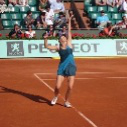

In [5]:
import PIL.Image as pil

t_img = pil.open("/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/003513_t.jpg")
t_img

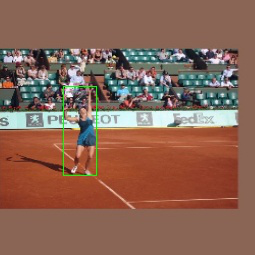

In [6]:
s_img = pil.open("/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/003513_s.jpg")
s_img

In [7]:
from torch.utils.data import DataLoader

def build_data_loader(cfg):

    train_set = DataSets(cfg['train_datasets'], cfg['anchors'], 20)
    train_set.shuffle()

    val_set = DataSets(cfg['val_datasets'], cfg['anchors'])
    val_set.shuffle()

    train_loader = DataLoader(train_set, batch_size=2, num_workers=20, pin_memory=True, sampler=None)
    val_loader = DataLoader(val_set, batch_size=2, num_workers=20, pin_memory=True, sampler=None)

    return train_loader, val_loader

In [8]:
train_loader, val_loader = build_data_loader(cfg)

shuffle done!
dataset length 12000000
dataset informations: 
{'template': 127, 'search': 255, 'template_small': False, 'gray': 0.25, 'neg': 0.2, 'inner_neg': 0, 'crop_size': 0, 'anchor_target': {'thr_high': 0.6, 'thr_low': 0.3, 'negative': 16, 'rpn_batch': 64, 'positive': 16}, 'num': 600000}
shuffle done!
dataset length 12000000
shuffle done!
dataset length 1000
dataset informations: 
{'template': 127, 'search': 255, 'template_small': False, 'gray': 0, 'neg': 0, 'inner_neg': 0, 'crop_size': 0, 'anchor_target': {'thr_high': 0.6, 'thr_low': 0.3, 'negative': 16, 'rpn_batch': 64, 'positive': 16}, 'num': 1000}
shuffle done!
dataset length 1000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## 2) 네트워크 정의 - Main model

In [9]:
from models.features import MultiStageFeature
from models.rpn import RPN, DepthCorr
from models.mask import Mask
import torch
import torch.nn as nn
from utils.load_helper import load_pretrain
from experiments.siammask_base.resnet import resnet50

Feature 추출 모듈(Backbone)

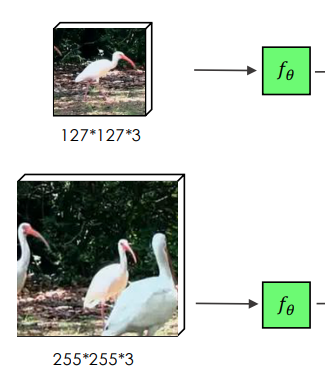

In [10]:
class ResDownS(nn.Module):
    def __init__(self, inplane, outplane):
        super(ResDownS, self).__init__()
        self.downsample = nn.Sequential(
                nn.Conv2d(inplane, outplane, kernel_size=1, bias=False),
                nn.BatchNorm2d(outplane))

    def forward(self, x):
        x = self.downsample(x)
        if x.size(3) < 20:
            l = 4
            r = -4
            x = x[:, :, l:r, l:r]
        return x
import sys


class ResDown(MultiStageFeature):
    def __init__(self, pretrain=False):
        super(ResDown, self).__init__()
        self.features = resnet50(layer3=True, layer4=False)
        if pretrain:
            load_pretrain(self.features,'/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/resnet.model')

        self.downsample = ResDownS(1024, 256)

        self.layers = [self.downsample, self.features.layer2, self.features.layer3]
        self.train_nums = [1, 3]
        self.change_point = [0, 0.5]

        self.unfix(0.0)

    def param_groups(self, start_lr, feature_mult=1):
        lr = start_lr * feature_mult

        def _params(module, mult=1):
            params = list(filter(lambda x:x.requires_grad, module.parameters()))
            if len(params):
                return [{'params': params, 'lr': lr * mult}]
            else:
                return []

        groups = []
        groups += _params(self.downsample)
        groups += _params(self.features, 0.1)
        return groups

    def forward(self, x):
        output = self.features(x)
        p3 = self.downsample(output[1])
        return p3

Template image와 Search image의 Feature map 사이의 DepthCorrelation을 수행하여 class와 물체의 위치를 추출하는 모듈

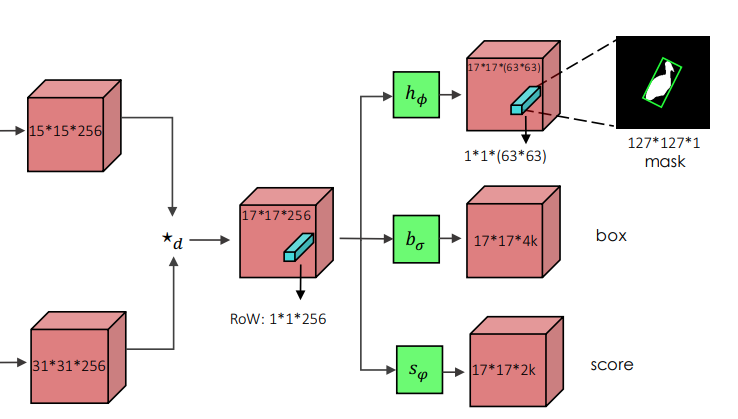

In [11]:
class UP(RPN):
    def __init__(self, anchor_num=5, feature_in=256, feature_out=256):
        super(UP, self).__init__()

        self.anchor_num = anchor_num
        self.feature_in = feature_in
        self.feature_out = feature_out

        self.cls_output = 2 * self.anchor_num
        self.loc_output = 4 * self.anchor_num

        self.cls = DepthCorr(feature_in, feature_out, self.cls_output)
        self.loc = DepthCorr(feature_in, feature_out, self.loc_output)

    def forward(self, z_f, x_f):
        cls = self.cls(z_f, x_f)
        loc = self.loc(z_f, x_f)
        return cls, loc

Segmentation 모듈

In [12]:
class MaskCorr(Mask):
    def __init__(self, oSz=63):
        super(MaskCorr, self).__init__()
        self.oSz = oSz
        self.mask = DepthCorr(256, 256, self.oSz**2)

    def forward(self, z, x):
        return self.mask(z, x)

전체 네트워크

In [13]:
class SiamMask(nn.Module):
    def __init__(self, anchors=None, o_sz=63, g_sz=127):
        super(SiamMask, self).__init__()
        self.anchors = anchors  # anchor_cfg
        self.anchor_num = len(self.anchors["ratios"]) * len(self.anchors["scales"])
        self.anchor = Anchors(anchors)
        self.features = None
        self.rpn_model = None
        self.mask_model = None
        self.o_sz = o_sz
        self.g_sz = g_sz
        self.upSample = nn.UpsamplingBilinear2d(size=[g_sz, g_sz])

        self.all_anchors = None

    def set_all_anchors(self, image_center, size):
        # cx,cy,w,h
        if not self.anchor.generate_all_anchors(image_center, size):
            return
        all_anchors = self.anchor.all_anchors[1]  # cx, cy, w, h
        self.all_anchors = torch.from_numpy(all_anchors).float().cuda()
        self.all_anchors = [self.all_anchors[i] for i in range(4)]

    def feature_extractor(self, x):
        return self.features(x)

    def rpn(self, template, search):
        pred_cls, pred_loc = self.rpn_model(template, search)
        return pred_cls, pred_loc

    def mask(self, template, search):
        pred_mask = self.mask_model(template, search)
        return pred_mask

    def _add_rpn_loss(self, label_cls, label_loc, label_loc_weight, label_mask, label_mask_weight, rpn_pred_cls, rpn_pred_loc, rpn_pred_mask):

        rpn_loss_cls = cross_entropy_loss(rpn_pred_cls, label_cls)

        rpn_loss_loc = l1_loss(rpn_pred_loc, label_loc)

        rpn_loss_mask, iou_m, iou_5, iou_7 = select_mask_logistic_loss(rpn_pred_mask, label_mask, label_mask_weight)

        return rpn_loss_cls, rpn_loss_loc, rpn_loss_mask, iou_m, iou_5, iou_7

    def run(self, template, search, softmax=False):
        """
        run network
        """
        #Template이미지의 Feature 추출을 위한 코드를 작성해주세요.
        # template_feature =
        template_feature = self.feature_extractor(template)
        #Search이미지의 Feature 추출을 위한 코드를 작성해주세요.
        # search_feature =
        search_feature = self.feature_extractor(search)
        #Template 이미지 feature사이와 Search 이미지 feature사이의 correlation을 통해 location과 class를 생성하는 코드를 작성해주세요.
        # rpn_pred_cls, rpn_pred_loc =
        rpn_pred_cls, rpn_pred_loc = self.rpn(template_feature, search_feature)
        #Template 이미지 feature사이와 Search 이미지 feature사이의 segmentation모델을 통해 mask를 생성하는 코드를 작성해주세요.
        # rpn_pred_mask =
        rpn_pred_mask = self.mask(template_feature, search_feature)

        if softmax:
            rpn_pred_cls = self.softmax(rpn_pred_cls)
        return rpn_pred_cls, rpn_pred_loc, rpn_pred_mask, template_feature, search_feature

    def softmax(self, cls):
        b, a2, h, w = cls.size()
        cls = cls.view(b, 2, a2//2, h, w)
        cls = cls.permute(0, 2, 3, 4, 1).contiguous()
        cls = F.log_softmax(cls, dim=4)
        return cls

    def forward(self, input):

        template = input['template']
        search = input['search']

        label_cls = input['label_cls']
        label_loc = input['label_loc']
        lable_loc_weight = input['label_loc_weight']
        label_mask = input['label_mask']
        label_mask_weight = input['label_mask_weight']

        rpn_pred_cls, rpn_pred_loc, rpn_pred_mask, template_feature, search_feature = self.run(template, search, softmax=self.training)

        outputs = dict()

        outputs['predict'] = [rpn_pred_loc, rpn_pred_cls, rpn_pred_mask, template_feature, search_feature]

        rpn_loss_cls, rpn_loss_loc, rpn_loss_mask, iou_acc_mean, iou_acc_5, iou_acc_7 = self._add_rpn_loss(label_cls, label_loc, label_loc_weight, label_mask, label_mask_weight, rpn_pred_cls, rpn_pred_loc, rpn_pred_mask)

        outputs['losses'] = [rpn_loss_cls, rpn_loss_loc, rpn_loss_mask]
        outputs['accuracy'] = [iou_acc_mean, iou_acc_5, iou_acc_7]

        return outputs

In [14]:
from models.siammask import SiamMask

class Custom(SiamMask):
    def __init__(self, pretrain=False, **kwargs):
        super(Custom, self).__init__(**kwargs)
        self.features = ResDown(pretrain=pretrain)
        self.rpn_model = UP(anchor_num=self.anchor_num, feature_in=256, feature_out=256)
        self.mask_model = MaskCorr()

    def template(self, template):
        self.zf = self.features(template)

    def track_mask(self, search):
        sf = self.features(search)
        rpn_pred_cls, rpn_pred_loc = self.rpn_model(self.zf, sf)
        pred_mask = self.mask_model(self.zf, sf)
        return rpn_pred_cls, rpn_pred_loc, pred_mask

In [15]:
model = Custom(pretrain=True, anchors=cfg['anchors'])
print('model prepare done')

[2023-07-19 06:39:23,426-rk0-load_helper.py# 31] load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/resnet.model
INFO:global:load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/resnet.model
[2023-07-19 06:39:31,395-rk0-load_helper.py# 25] remove prefix 'module.'
INFO:global:remove prefix 'module.'
[2023-07-19 06:39:31,402-rk0-load_helper.py# 13] [Warning] missing keys: {'layer3.3.bn3.num_batches_tracked', 'layer3.1.bn2.num_batches_tracked', 'layer3.3.bn1.num_batches_tracked', 'layer3.1.bn1.num_batches_tracked', 'layer3.0.bn3.num_batches_tracked', 'layer3.4.bn2.num_batches_tracked', 'layer3.5.bn1.num_batches_tracked', 'layer1.0.bn2.num_batches_tracked', 'layer3.1.bn3.num_batches_tracked', 'layer3.2.bn3.num_batches_tracked', 'layer3.2.bn1.num_batches_tracked', 'layer2.0.bn1.num_batches_tracked', 'layer3.0.bn1.num_batches_tracked', 'layer2.1.bn1.num_batches_tracked', 'layer2.0.bn2.num_batches_tracked', 'layer2.3.

model prepare done


In [16]:
from utils.lr_helper import build_lr_scheduler

def build_opt_lr(model, cfg, epoch):
    backbone_feature = model.features.param_groups(cfg['lr']['start_lr'], cfg['lr']['feature_lr_mult'])
    if len(backbone_feature) == 0:
        trainable_params = model.rpn_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['rpn_lr_mult'], 'mask')
    else:
        trainable_params = backbone_feature + model.rpn_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['rpn_lr_mult']) + model.mask_model.param_groups(cfg['lr']['start_lr'], cfg['lr']['mask_lr_mult'])

    optimizer = torch.optim.SGD(trainable_params, 0.001, momentum=0.9, weight_decay=1e-4)

    lr_scheduler = build_lr_scheduler(optimizer, cfg['lr'], epochs=20)

    lr_scheduler.step(epoch)

    return optimizer, lr_scheduler

In [17]:
optimizer, lr_scheduler = build_opt_lr(model, cfg, 0)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://githu

## 3) One epoch Training 코드

In [19]:
import time
import numpy as np
from utils.average_meter_helper import AverageMeter
from utils.log_helper import print_speed
import cv2

# global cur_lr
cur_lr = lr_scheduler.get_cur_lr()
avg = AverageMeter()
model.train()
model = model.cuda()
end = time.time()


num_per_epoch = len(train_loader.dataset) // 20 // 2
start_epoch = 0
epoch = 0
for iter, input in enumerate(train_loader):

    if epoch != iter // num_per_epoch + start_epoch:  # next epoch
        epoch = iter // num_per_epoch + start_epoch
        lr_scheduler.step(epoch)
        cur_lr = lr_scheduler.get_cur_lr()

    data_time = time.time() - end
    avg.update(data_time=data_time)

    x = {
        'cfg': cfg,
        'template': torch.autograd.Variable(input[0]).cuda(),
        'search': torch.autograd.Variable(input[1]).cuda(),
        'label_cls': torch.autograd.Variable(input[2]).cuda(),
        'label_loc': torch.autograd.Variable(input[3]).cuda(),
        'label_loc_weight': torch.autograd.Variable(input[4]).cuda(),
        'label_mask': torch.autograd.Variable(input[6]).cuda(),
        'label_mask_weight': torch.autograd.Variable(input[7]).cuda(),
    }

    outputs = model(x)

    rpn_cls_loss, rpn_loc_loss, rpn_mask_loss = torch.mean(outputs['losses'][0]), torch.mean(outputs['losses'][1]), torch.mean(outputs['losses'][2])
    mask_iou_mean, mask_iou_at_5, mask_iou_at_7 = torch.mean(outputs['accuracy'][0]), torch.mean(outputs['accuracy'][1]), torch.mean(outputs['accuracy'][2])

    cls_weight, reg_weight, mask_weight = cfg['loss']['weight']

    loss = rpn_cls_loss * cls_weight + rpn_loc_loss * reg_weight + rpn_mask_loss * mask_weight

    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 10.0)  # gradient clip

    optimizer.step()

    siammask_loss = loss.item()

    batch_time = time.time() - end

    avg.update(batch_time=batch_time, rpn_cls_loss=rpn_cls_loss, rpn_loc_loss=rpn_loc_loss, rpn_mask_loss=rpn_mask_loss, siammask_loss=siammask_loss, mask_iou_mean=mask_iou_mean, mask_iou_at_5=mask_iou_at_5, mask_iou_at_7=mask_iou_at_7)

    end = time.time()

    if (iter + 1) % 10 == 0:
        print('Epoch: [{0}][{1}/{2}] lr: {lr:.6f}\t{batch_time:s}\t{data_time:s}'
                    '\t{rpn_cls_loss:s}\t{rpn_loc_loss:s}\t{rpn_mask_loss:s}\t{siammask_loss:s}'
                    '\t{mask_iou_mean:s}\t{mask_iou_at_5:s}\t{mask_iou_at_7:s}'.format(
                    epoch+1, (iter + 1) % num_per_epoch, num_per_epoch, lr=cur_lr, batch_time=avg.batch_time,
                    data_time=avg.data_time, rpn_cls_loss=avg.rpn_cls_loss, rpn_loc_loss=avg.rpn_loc_loss,
                    rpn_mask_loss=avg.rpn_mask_loss, siammask_loss=avg.siammask_loss, mask_iou_mean=avg.mask_iou_mean,
                    mask_iou_at_5=avg.mask_iou_at_5,mask_iou_at_7=avg.mask_iou_at_7))
        print_speed(iter + 1, avg.batch_time.avg, 20 * num_per_epoch)


[2023-07-19 06:45:00,402-rk0-log_helper.py# 97] Progress: 10 / 6000000 [0%], Speed: 0.354 s/iter, ETA 24:14:08 (D:H:M)

INFO:global:Progress: 10 / 6000000 [0%], Speed: 0.354 s/iter, ETA 24:14:08 (D:H:M)



Epoch: [1][10/300000] lr: 0.001000	batch_time: 0.041400 (0.354088)	data_time: 0.000642 (0.285232)	rpn_cls_loss: 0.345431 (0.305424)	rpn_loc_loss: 0.313003 (0.413941)	rpn_mask_loss: 0.398847 (0.347298)	siammask_loss: 15.079542 (13.304896)	mask_iou_mean: 0.000000 (0.000000)	mask_iou_at_5: 0.000000 (0.000000)	mask_iou_at_7: 0.000000 (0.000000)


KeyboardInterrupt: ignored

## 4) Test 코드
앞서 Training한 모델로 Tracking하는 물체의 Bounding Box 좌표를 추출하는 과정입니다.

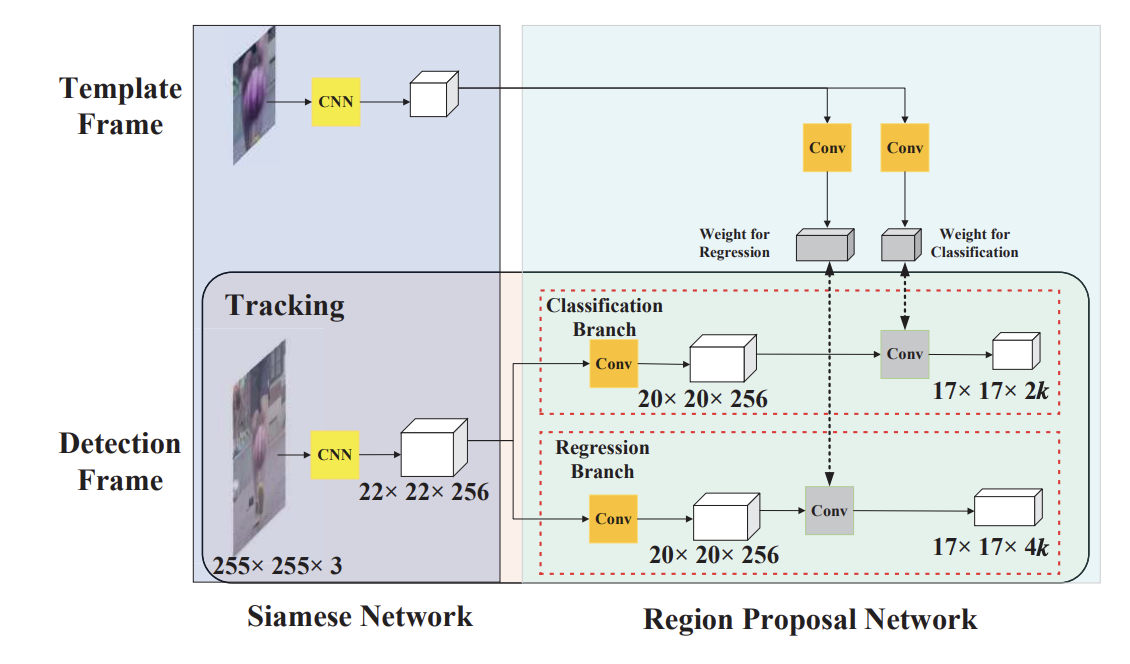

* Proposal selection

(1) Size penalty -> suppress large change in size and ratio

(2) cosine window -> suppress large displacement

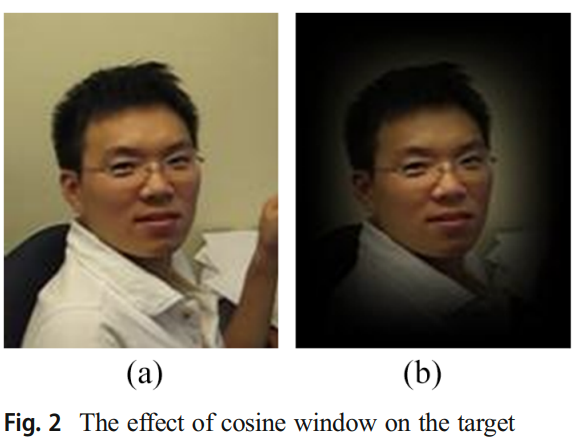

### VOT2018 Dataset Test

Visaul object tracking challenge dataset

Test Dataset : 61

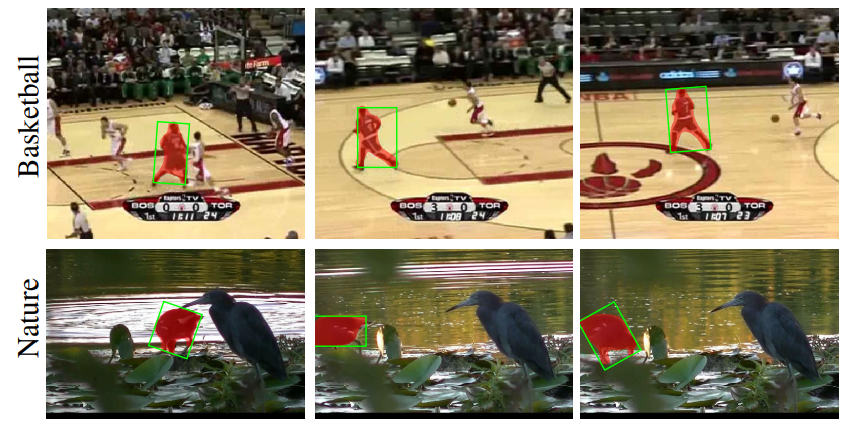

In [20]:
cd /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/SiamMask


In [21]:
from __future__ import division
import argparse
import logging
import numpy as np
import cv2
from PIL import Image
from os import makedirs
from os.path import join, isdir, isfile
from matplotlib import pyplot as plt

import sys
sys.path.append("/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/")
from utils.log_helper import init_log, add_file_handler
from utils.load_helper import load_pretrain
from utils.bbox_helper import get_axis_aligned_bbox, cxy_wh_2_rect
from utils.benchmark_helper import load_dataset
import torch
from torch.autograd import Variable
import torch.nn.functional as F

from utils.anchors import Anchors
from utils.tracker_config import TrackerConfig

from utils.config_helper import load_config
import matplotlib.patches as patches
from tools.test import get_subwindow_tracking, generate_anchor, to_torch, im_to_torch, siamese_init

thrs = np.arange(0.3, 0.5, 0.05)

def siamese_track(state, im, mask_enable=False, refine_enable=False, device='cpu', debug=False):
    p = state['p'] #config
    net = state['net'] #network
    avg_chans = state['avg_chans']
    window = state['window']
    target_pos = state['target_pos'] #이전 frame의 obejct bounding box 위치
    target_sz = state['target_sz'] #이전 frame의 obejct bounding box 크기

    #padding 비율 맞추는 부분
    wc_x = target_sz[1] + p.context_amount * sum(target_sz)
    hc_x = target_sz[0] + p.context_amount * sum(target_sz)
    s_x = np.sqrt(wc_x * hc_x)
    scale_x = p.exemplar_size / s_x

    d_search = (p.instance_size - p.exemplar_size) / 2
    pad = d_search / scale_x
    s_x = s_x + 2 * pad

    # extract scaled crops for search region x at previous target position
    x_crop = Variable(get_subwindow_tracking(im, target_pos, p.instance_size, round(s_x), avg_chans).unsqueeze(0))

    score, delta, mask = net.track_mask(x_crop.to(device)) #rpn을 통해 추출

    delta = delta.permute(1, 2, 3, 0).contiguous().view(4, -1).data.cpu().numpy()
    score = F.softmax(score.permute(1, 2, 3, 0).contiguous().view(2, -1).permute(1, 0), dim=1).data[:,1].cpu().numpy()

    #delta값 이용하여 anchor box조정
    delta[0, :] = delta[0, :] * p.anchor[:, 2] + p.anchor[:, 0]
    delta[1, :] = delta[1, :] * p.anchor[:, 3] + p.anchor[:, 1]
    delta[2, :] = np.exp(delta[2, :]) * p.anchor[:, 2]
    delta[3, :] = np.exp(delta[3, :]) * p.anchor[:, 3]

    # size penalty
    def change(r):
        return np.maximum(r, 1. / r)

    def sz(w, h):
        pad = (w + h) * 0.5
        sz2 = (w + pad) * (h + pad)
        return np.sqrt(sz2)

    def sz_wh(wh):
        pad = (wh[0] + wh[1]) * 0.5
        sz2 = (wh[0] + pad) * (wh[1] + pad)
        return np.sqrt(sz2)


    target_sz_in_crop = target_sz * scale_x
    s_c = change(sz(delta[2, :], delta[3, :]) / (sz_wh(target_sz_in_crop)))  # scale penalty
    r_c = change((target_sz_in_crop[0] / target_sz_in_crop[1]) / (delta[2, :] / delta[3, :]))  # ratio penalty

    penalty = np.exp(-(r_c * s_c - 1) * p.penalty_k)
    pscore = penalty * score

    # cosine window (motion model)
    pscore = pscore * (1 - p.window_influence) + window * p.window_influence
    best_pscore_id = np.argmax(pscore)

    pred_in_crop = delta[:, best_pscore_id] / scale_x
    lr = penalty[best_pscore_id] * score[best_pscore_id] * p.lr

    res_x = pred_in_crop[0] + target_pos[0]
    res_y = pred_in_crop[1] + target_pos[1]

    res_w = target_sz[0] * (1 - lr) + pred_in_crop[2] * lr
    res_h = target_sz[1] * (1 - lr) + pred_in_crop[3] * lr

    target_pos = np.array([res_x, res_y])
    target_sz = np.array([res_w, res_h])


    target_pos[0] = max(0, min(state['im_w'], target_pos[0]))
    target_pos[1] = max(0, min(state['im_h'], target_pos[1]))
    target_sz[0] = max(10, min(state['im_w'], target_sz[0]))
    target_sz[1] = max(10, min(state['im_h'], target_sz[1]))

    state['target_pos'] = target_pos
    state['target_sz'] = target_sz
    state['score'] = score[best_pscore_id]
    return state


In [22]:
def track_vot(model, video, hp=None, mask_enable=False, refine_enable=False, device='cpu'):
    regions = []
    image_files, gt = video['image_files'], video['gt']

    start_frame, end_frame, toc = 0, len(image_files), 0

    all_frames = []
    fig = plt.figure()

    for f, image_file in enumerate(image_files):
        im = cv2.imread(image_file)
        tic = cv2.getTickCount()

        if f == start_frame:  # 이미지와 target box를 넣어 어디있는지 파악
            cx, cy, w, h = get_axis_aligned_bbox(gt[f]) #처음 물체의 위치를 파악
            target_pos = np.array([cx, cy]) #bounding box의 center
            target_sz = np.array([w, h]) #box 사이즈
            state = siamese_init(im, target_pos, target_sz, model, hp, device)  # init tracker
            location = cxy_wh_2_rect(state['target_pos'], state['target_sz'])
            regions.append(1)

        elif f > start_frame:
            state = siamese_track(state, im, mask_enable, refine_enable, device, False)  #state : 이전 state img : 현재 이미지
            location = cxy_wh_2_rect(state['target_pos'], state['target_sz'])

            gt_polygon = ((gt[f][0], gt[f][1]), (gt[f][2], gt[f][3]),(gt[f][4], gt[f][5]), (gt[f][6], gt[f][7]))

            pred_polygon = ((location[0], location[1]), (location[0] + location[2], location[1]), (location[0] + location[2], location[1] + location[3]), (location[0], location[1] + location[3]))

            b_overlap = 1

            regions.append(location)

        else:  # skip
            regions.append(0)
        toc += cv2.getTickCount() - tic

        if f >= start_frame:  # visualization
            result_path = "/content/gdrive/MyDrive/Siammask_Test/"
            if not isdir(result_path): makedirs(result_path)
            im_show = im.copy()
            if f == 0: cv2.destroyAllWindows()
            if gt.shape[0] > f:
                if len(gt[f]) == 8:
                    cv2.polylines(im_show, [np.array(gt[f], np.int).reshape((-1, 1, 2))], True, (0, 255, 0), 3)
                else:
                    cv2.rectangle(im_show, (gt[f, 0], gt[f, 1]), (gt[f, 0] + gt[f, 2], gt[f, 1] + gt[f, 3]), (0, 255, 0), 3)
            if len(location) == 8:
                location_int = np.int0(location)
            else:
                location = [int(l) for l in location]
                cv2.rectangle(im_show, (location[0], location[1]),(location[0] + location[2], location[1] + location[3]), (0, 255, 255), 3)

            cv2.imwrite('/content/gdrive/MyDrive/Siammask_Test/Test_{:s}_{:06d}.png'.format(video['name'], f), im_show)

    for x in regions:
        print("{:d}\n".format(x)) if isinstance(x, int) else print(','.join(["{:.4f}".format(i) for i in x]) + '\n')

    print('({:d}) Video: {:12s} Time: {:02.1f}s Speed: {:3.1f}fps'.format(v_id, video['name'], toc, f / toc))

    return f / toc, fig, all_frames

In [23]:
from custom import Custom
from types import SimpleNamespace
from utils.config_helper import load_config
from utils.load_helper import load_pretrain
from utils.benchmark_helper import load_dataset

cfg = load_config(SimpleNamespace(config='/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/config_vot.json'))

# setup model
model = Custom(anchors=cfg['anchors'])
model = load_pretrain(model, "/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth")
model.eval()
model = model.cuda()

# setup dataset
dataset = load_dataset("test_VOT2018")

total_lost = 0  # VOT
speed_list = []

for v_id, video in enumerate(dataset.keys(), start=1):

    speed, fig, all_frame = track_vot(model, dataset[video], cfg['hp'] if 'hp' in cfg.keys() else None, False, False, device='cuda')
    speed_list.append(speed)

print('Mean Speed: {:.2f} FPS'.format(np.mean(speed_list)))

[2023-07-19 06:49:02,696-rk0-features.py# 66] Current training 0 layers:
	
INFO:global:Current training 0 layers:
	
[2023-07-19 06:49:02,702-rk0-features.py# 66] Current training 1 layers:
	
INFO:global:Current training 1 layers:
	
[2023-07-19 06:49:02,789-rk0-load_helper.py# 31] load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
INFO:global:load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
[2023-07-19 06:49:03,679-rk0-load_helper.py# 25] remove prefix 'module.'
INFO:global:remove prefix 'module.'
[2023-07-19 06:49:03,689-rk0-load_helper.py# 18] used keys:356
INFO:global:used keys:356


/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/data/test_VOT2018


<ipython-input-22-15c5d0327a11>:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.polylines(im_show, [np.array(gt[f], np.int).reshape((-1, 1, 2))], True, (0, 255, 0), 3)


1

122.5947,340.6400,80.9313,91.2456

124.5376,335.0795,79.8485,94.5992

121.6151,336.7174,80.9231,95.9520

115.1943,339.0974,83.2797,93.9195

115.7704,348.2870,86.2240,89.2989

122.3949,346.7334,92.6892,82.0726

122.2428,337.0769,97.5531,78.6125

110.8676,317.0741,96.6736,78.7907

106.0506,285.7606,93.4734,84.8201

114.9586,256.8874,88.3565,93.8421

125.8065,245.9415,82.9540,103.2000

130.8824,232.8816,77.3345,112.0136

132.9483,216.7293,74.5435,115.4792

125.8490,212.5570,73.9306,116.2607

124.1634,224.0746,75.1945,111.7888

133.0600,236.1113,83.6432,101.6691

145.0085,253.5197,92.8135,91.1442

144.8841,250.8073,95.4673,88.3841

147.7141,241.1349,95.8594,88.4974

152.1132,225.0869,97.7552,86.9948

143.3436,201.2627,102.7532,82.4732

128.4204,173.9336,100.9695,82.6133

129.9664,149.4091,93.4003,87.4371

140.5797,133.6446,87.0035,94.1415

152.2626,123.5919,82.8656,98.8707

161.6680,122.5712,79.2202,104.8426

167.0427,123.6115,77.9929,110.2426

171.9533,117.8205,76.3089,111.9360

173.40

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Output 결과 Visualization

In [24]:
import cv2
import matplotlib.pyplot as plt

video_list = ['ball2','butterfly']

for video_name in video_list:
  for f in range(1,4):

    img = cv2.imread("/content/gdrive/MyDrive/Siammask_Test/Test_{:s}_{:06d}.png".format(video_name, f*5))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if video_name == 'ball2':
      plt.figure(figsize=(40, 30))
      plt.subplot(2, 3, int(f))
      plt.imshow(img)
      plt.axis('off')
    else:
      plt.figure(figsize=(15, 15))
      plt.subplot(2, 3, int(f)+3)
      plt.imshow(img)
      plt.axis('off')

#green : GT yellow : Pred

Output hidden; open in https://colab.research.google.com to view.

## 5) Test 결과 Evaluation
앞서 Test시에 구한 Bounding Box를 이용하서 성능을 측정하는 과정입니다.
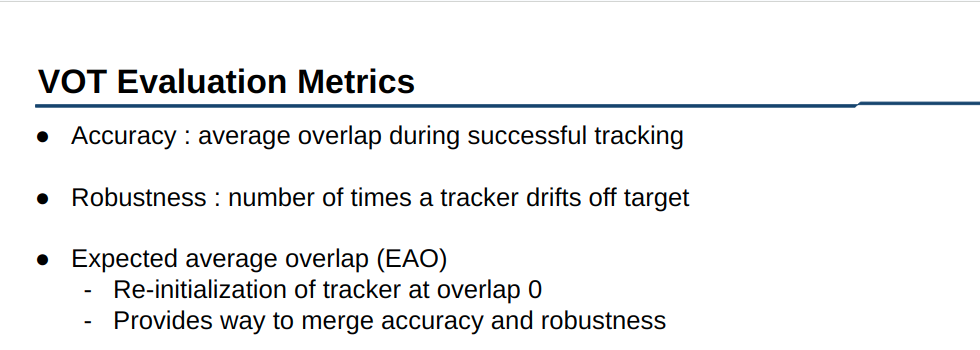

Accuracy : 비디오 전체에서 얼만큼 IoU가 threshold(얼마나 정확하게 tracking 했는지 나타내는 값 ex. 0.8) 보다 높은지

Robustness : Robustness는 비디오 전체에서 IoU가 threshold(얼마나 부정확하게 tracking 했는지 나타내는 값 ex. 0.2) 보다 낮게 계산되어 위치값을 다시 주어야 하는 경우를 카운트한 값

/SiamMask/test/VOT2018/ 폴더에 61개의 test dataset 결과가 저장되어 있습니다.

In [26]:
!python tools/eval.py --dataset VOT2018 --tracker_prefix C --result_dir ./test/VOT2018

eval eao: 100%|███████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.12s/it]
---------------------------------------------------------------------
|    Tracker Name     | Accuracy | Robustness | Lost Number |  EAO  |
---------------------------------------------------------------------
| Custom_SiamMask_VOT |  0.610   |   0.281    |    60.0     | 0.380 |
---------------------------------------------------------------------


## 6) Youtube영상 이용하여 Demo

In [27]:
cd /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/SiamMask/experiments/siammask_sharp


In [28]:
from types import SimpleNamespace
from custom import Custom
# init SiamMask
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cfg = load_config(SimpleNamespace(config='/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/config_vot.json'))
siammask = Custom(anchors=cfg['anchors'])
siammask = load_pretrain(siammask, pretrained_path='/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth')
siammask = siammask.eval().to(device)

[2023-07-19 06:54:19,883-rk0-features.py# 66] Current training 0 layers:
	
INFO:global:Current training 0 layers:
	
[2023-07-19 06:54:19,889-rk0-features.py# 66] Current training 1 layers:
	
INFO:global:Current training 1 layers:
	
[2023-07-19 06:54:20,006-rk0-load_helper.py# 31] load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
INFO:global:load pretrained model from /content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/experiments/siammask_sharp/SiamMask_VOT.pth
[2023-07-19 06:54:20,335-rk0-load_helper.py# 25] remove prefix 'module.'
INFO:global:remove prefix 'module.'
[2023-07-19 06:54:20,346-rk0-load_helper.py# 18] used keys:356
INFO:global:used keys:356


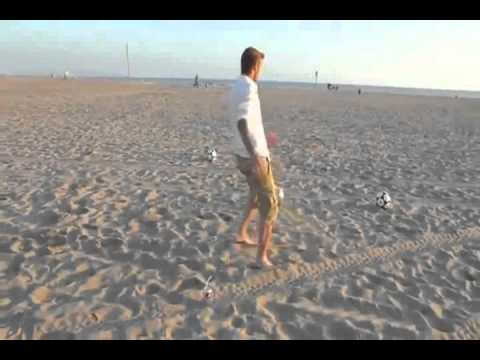

In [29]:
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'c_6-8kvLFCs'


YouTubeVideo(YOUTUBE_ID)

In [30]:
cd ../../

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/SiamMask


In [31]:
import cv2
import torchvision
from tools.test import get_subwindow_tracking, generate_anchor, to_torch, im_to_torch, siamese_init, siamese_track

f = 0
video_capture = cv2.VideoCapture()
if video_capture.open('/content/gdrive/MyDrive/Samsung_AI_expert/SiamMask/youtube.mp4'):
    width, height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = video_capture.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter("/content/gdrive/MyDrive/siammask_output.avi", cv2.VideoWriter_fourcc(*'MJPG'), fps, (width, height))

    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
              break

        if f == 0:
          # detect a person on the first frame with Mask R-CNN
            maskrcnn = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
            maskrcnn = maskrcnn.eval()
            output = maskrcnn([torchvision.transforms.functional.to_tensor((frame[...,::-1] / 255).astype(np.float32))])[0]

            target_pos, target_sz = None, None
            for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
            # search for a person with atleast 70% probability
                if score > 0.7 and label == 1:
                    box = box.detach().numpy()
                    x, y = int(box[0]), int(box[1])
                    w, h = int(box[2]) - x, int(box[3]) - y
                    target_pos = np.array([x + w / 2, y + h / 2])
                    target_sz = np.array([w, h])
                    break
            assert target_pos is not None, "no person found on the first frame!"
            print("person found:", target_pos, target_sz)

      # init tracker
            state = siamese_init(frame, target_pos, target_sz, siammask, cfg['hp'], device=device)
        else:
            state = siamese_track(state, frame, mask_enable=True, refine_enable=True, device=device)
            location = state['ploygon'].flatten()
            mask = state['mask'] > state['p'].seg_thr

            frame[:, :, 2] = (mask > 0) * 255 + (mask == 0) * frame[:, :, 2]
            cv2.polylines(frame, [np.int0(location).reshape((-1, 1, 2))], True, (0, 255, 0), 3)

            video_writer.write(frame)

        f += 1
        # only on first 100 frames
        if f > 300:
            break

    video_capture.release()
    video_writer.release()

  # convert AVI to MP4
    !ffmpeg -y -loglevel info -i /content/gdrive/MyDrive/siammask_output.avi /content/gdrive/MyDrive/siammask_output.mp4

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 190MB/s]


person found: [290.  255.5] [ 78 287]


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [32]:
import io
import base64
from IPython.display import HTML

def show_local_mp4_video(file_name, width=640, height=480):
    video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
    return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/gdrive/MyDrive/siammask_output.mp4', width=960, height=720)